# **Econometria Aplicada**

## Aula 5 - Modelos com dados em painel
---



**Motivação**:

Em análises setoriais ou de avaliação de empresas, muitas vezes os analistas são confrontados com a tarefa de estimar funções de custo para a(s) em questão. Quando a base de dados possui informações de empresas em diferentes momentos do tempo, pode se fazer importante considerar características não-observáveis nessas estimativas. Trabalhemos com o caso das companhias áreas norte-americanas utilizado em Greene (2003). Como podemos estimar uma função de custos a partir da base de dados para seis empresas aéreas dos EUA?

Nas atividades nós vamos utilizar o pacote `AER` para o download da base de dados intitulada `USAirlines`. A base contém 90 observações referentes à 6 companhias aéreas e possui dados anuais (1970-1984) sobre a produção, os custos totais, a capacidade utilizada e o preço do combustível para cada uma das firmas.

### **Pacotes**

In [ ]:
 install.packages("AER")

In [ ]:
install.packages("broom")

In [ ]:
library(AER)
library(ggplot2)
library(broom)

### **Dados**

In [ ]:
data("USAirlines", package = "AER")

In [ ]:
head(USAirlines, 30)

In [ ]:
str(USAirlines)

## **1) Vamos olhar para os dados**

##### a. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (`cost`) e o índice com a produção das empresas (`output`).

In [1]:
# Definir tamanho personalizado
largura <- 10  # largura do gráfico em polegadas
altura <- 6    # altura do gráfico em polegadas

# Gráfico de dispersão com cores diferentes para cada firma
scatter_plot <- ggplot(USAirlines, aes(x = cost, y = output, color = firm)) +
  geom_point(size = 3) +
  xlab("Custos Totais") +
  ylab("Índice de Produção") +
  ggtitle("Gráfico de Dispersão: Custos Totais vs. Índice de Produção por Firma") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5)) +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot

ERROR: ignored

##### b. Faça, em um mesmo gráfico, a relação entre os custos totais em milhares de dólares (`cost`) e o índice com a produção das empresas (`output`), mas considere curvas diferentes para cada uma das empresas. Por que as curvas não começam nos mesmos pontos?

`geom_smooth()` using formula = 'y ~ x'


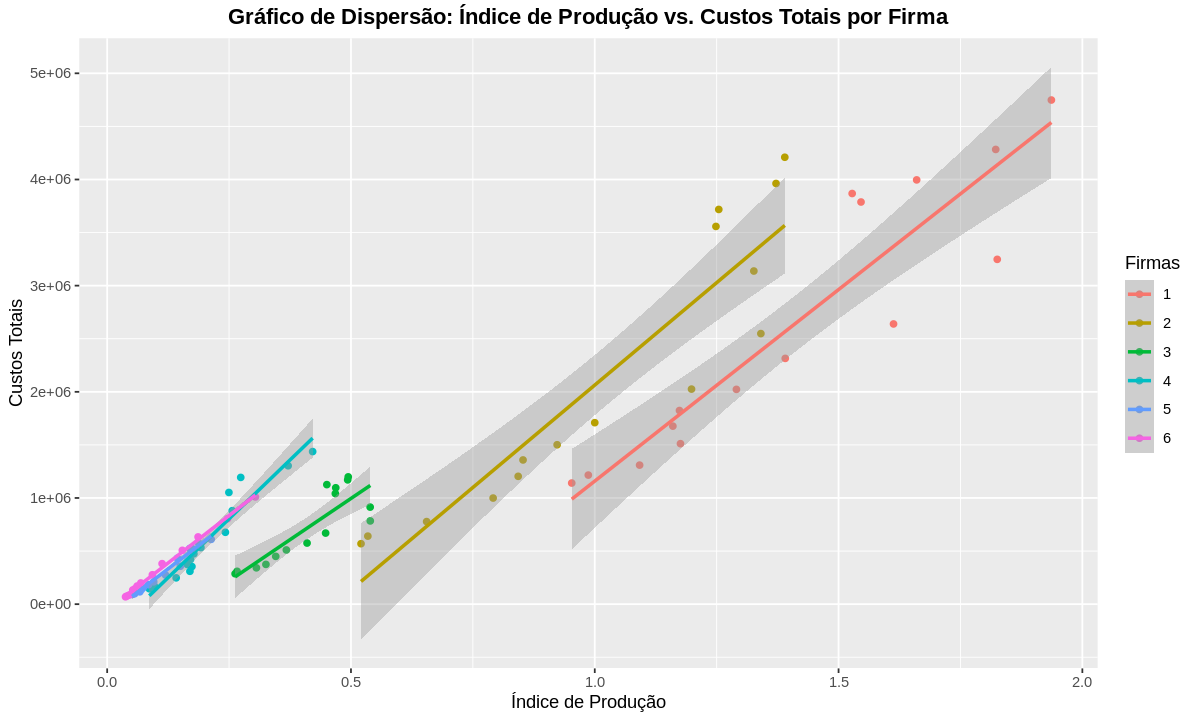

In [33]:
# Criar o gráfico de dispersão com cores diferentes para cada firma e linha de regressão
scatter_plot_with_lines <- ggplot(USAirlines, aes(x = output, y = cost, color = firm)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Gráfico de Dispersão: Índice de Produção vs. Custos Totais por Firma",
       x = "Índice de Produção",
       y = "Custos Totais") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "right")  +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot_with_lines

##### c. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (`cost`) e o preço do combustível (`price`).

`geom_smooth()` using formula = 'y ~ x'


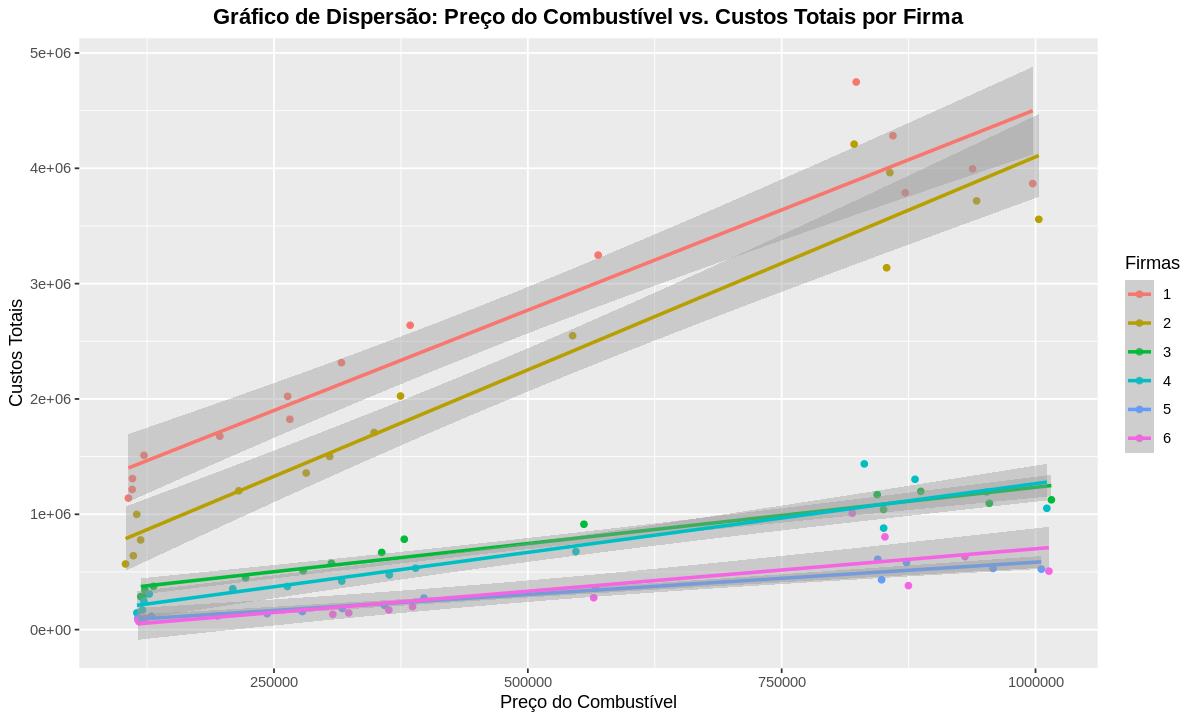

In [31]:
# Criar o gráfico de dispersão com cores diferentes para cada firma e linha de regressão
scatter_plot_with_lines <- ggplot(USAirlines, aes(x = price, y = cost, color = firm)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Gráfico de Dispersão: Preço do Combustível vs. Custos Totais por Firma",
       x = "Preço do Combustível",
       y = "Custos Totais") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "right")  +
  labs(color = "Firmas")  # Adicionar título da legenda

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot_with_lines

## **2) Descreva os gráficos**

##### Com base nos gráficos dos itens anteriores, descreva os padrões observados.

- ABC

## **3) A estimativa**

Lembre-se do objetivo: estimar uma função de custos para as empresas do setor aéreo nos EUA. Nas suas estimativas, encontre as elasticidades dos custos em relação ao total produzido, ao preço dos combustíveis e a semi-elasticidade em relação à capacidade utilizada (`load`).

Qual é a conclusão?

- ABC

## **4) Aplicação**

Quais os custos totais esperados de uma empresa que produza **`1,2`**, cujos preços dos combustíveis estejam em **`121.000`** e que utilize **`65%`** da sua capacidade?